In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
import numpy as np
import seaborn as sb
#df['Output']=np.where(df['Outcome']==1,"Diabetic","Non-Diabetic")

In [7]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
#sb.pairplot(df,hue="Output")

In [9]:
X=df.drop(['Outcome'],axis=1).values

In [10]:
Y=df['Outcome'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=30)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [13]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
Y_train=torch.LongTensor(Y_train)
Y_test=torch.LongTensor(Y_test)

In [14]:
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)       
    def forward(self,x):
        x1=F.relu(self.f_connected1(x))
        x2=F.relu(self.f_connected2(x1))
        x3=self.out(x2)
        return x3

In [15]:
###### Instantiate my ANN model
torch.manual_seed(20)
model=ANN_model()

In [16]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [17]:
## Backward propagation---loss function and optimiser
loss_funtion=nn.CrossEntropyLoss()
optimiser=torch.optim.Adam(model.parameters(),lr=0.001)

In [18]:
final_loss=[]
epochs=500
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_funtion(y_pred,Y_train)
    final_loss.append(loss)
    if i%10==1:
        print("epoch number is {}  and loss is {}".format(i,loss.item()))
    #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates 
    #the gradients on subsequent backward passes. This is convenient while training RNNs
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

epoch number is 1  and loss is 3.513779640197754
epoch number is 11  and loss is 1.467028021812439
epoch number is 21  and loss is 0.8120400905609131
epoch number is 31  and loss is 0.6969018578529358
epoch number is 41  and loss is 0.6322578191757202
epoch number is 51  and loss is 0.6153013706207275
epoch number is 61  and loss is 0.6000742316246033
epoch number is 71  and loss is 0.5930331349372864
epoch number is 81  and loss is 0.585118293762207
epoch number is 91  and loss is 0.5787162780761719
epoch number is 101  and loss is 0.5743056535720825
epoch number is 111  and loss is 0.5712182521820068
epoch number is 121  and loss is 0.5683453679084778
epoch number is 131  and loss is 0.5653042197227478
epoch number is 141  and loss is 0.5626713633537292
epoch number is 151  and loss is 0.5603340268135071
epoch number is 161  and loss is 0.5579966902732849
epoch number is 171  and loss is 0.5557388663291931
epoch number is 181  and loss is 0.5537382960319519
epoch number is 191  and l

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'ephocs')

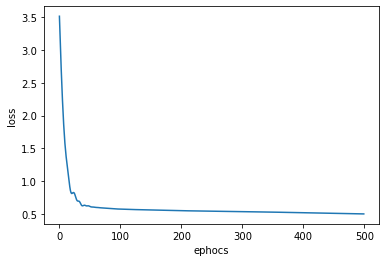

In [20]:
plt.plot(range(epochs),final_loss)
plt.ylabel("loss")
plt.xlabel("ephocs")

In [21]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
1


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions,Y_test)

In [23]:
cm

array([[99, 28],
       [31, 34]], dtype=int64)

Text(69.0, 0.5, 'predicted values')

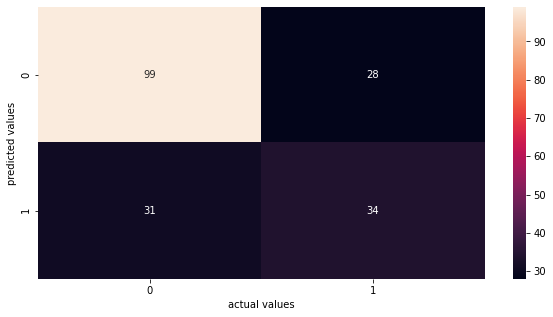

In [24]:
plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True)
plt.xlabel("actual values")
plt.ylabel("predicted values")

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,predictions)
score

0.6927083333333334

In [26]:
torch.save(model,"diabetic.pt")

C:\Users\adity\Anaconda3\lib\site-packages\torch\serialization.py:251: UserWarning: Couldn't retrieve source code for container of type ANN_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [27]:
model=torch.load("diabetic.pt")

In [28]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [29]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [30]:
lst=[2.0, 184.0, 72.0, 35.0, 0.0, 65.6, 0.627, 30.0]

In [31]:
new_data=torch.tensor(lst)

In [57]:
new_data

tensor([  2.0000, 184.0000,  72.0000,  35.0000,   0.0000,  65.6000,   0.6270,
         30.0000])

In [58]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.8519, 4.4238])
1
